<a href="https://colab.research.google.com/github/mdismail8098/html.portfolio/blob/main/Mohamed_Ismail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

In [3]:
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

In [4]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

In [5]:
region_distribution = customers_df["Region"].value_counts()


In [6]:
category_distribution = products_df["Category"].value_counts()


In [7]:
transactions_df["MonthYear"] = transactions_df["TransactionDate"].dt.to_period("M")
monthly_transactions = transactions_df["MonthYear"].value_counts().sort_index()

In [8]:
signup_years = customers_df["SignupDate"].dt.year.value_counts().sort_index()

In [9]:
merged_data = transactions_df.merge(products_df, on="ProductID")
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)


In [10]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Number of Customers')

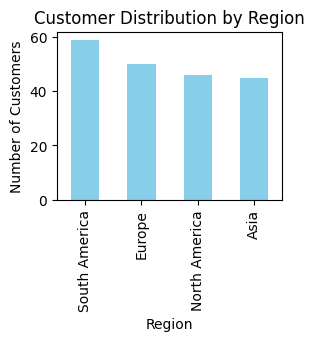

In [11]:
plt.subplot(2, 2, 1)
region_distribution.plot(kind="bar", color="skyblue", title="Customer Distribution by Region")
plt.ylabel("Number of Customers")


Text(0.5, 0, 'Month-Year')

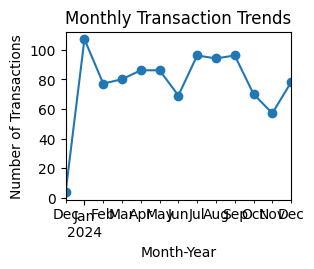

In [12]:
plt.subplot(2, 2, 3)
monthly_transactions.plot(kind="line", marker="o", title="Monthly Transaction Trends")
plt.ylabel("Number of Transactions")
plt.xlabel("Month-Year")


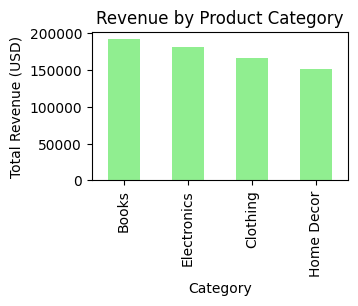

In [13]:
plt.subplot(2, 2, 4)
category_revenue.plot(kind="bar", color="lightgreen", title="Revenue by Product Category")
plt.ylabel("Total Revenue (USD)")

plt.tight_layout()
plt.show()

In [14]:
insights = {
    "Region Distribution": region_distribution,
    "Category Distribution": category_distribution,
    "Top Monthly Transactions": monthly_transactions.head(5),
    "Signup Year Trends": signup_years,
    "Category Revenue": category_revenue
}

In [16]:
insights_df = pd.DataFrame({
    "Region Distribution": region_distribution,
    "Category Distribution": category_distribution,
    "Category Revenue": category_revenue
})
insights_path = "EDA_Insights.csv"
insights_df.to_csv(insights_path)

insights_path

'EDA_Insights.csv'